<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Austo_Automobile</center></font>

##**Context**
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

##**Objective**
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

##**Key Questions**
 1. Do men tend to prefer SUVs more compared to women?
 2. What is the likelihood of a salaried person buying a Sedan?
 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?
 4. How does the the amount spent on purchasing automobiles vary by gender?
 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?
 6. How does having a working partner influence the purchase of higher-priced cars?
##**Data Description**

**Age**: The age of the individual in years.

**Gender**: The gender of the individual, categorized as male or female.

**Profession**: The occupation or profession of the individual.

**Marital_status**: The marital status of the individual, such as married &, single

**Education**: The educational qualification of the individual Graduate and Post Graduate

**No_of_Dependents**: The number of dependents (e.g., children, elderly parents) that the individual supports financially.

**Personal_loan**: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"

**House_loan**: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"

**Partner_working**: A binary variable indicating whether the individual's partner is employed "Yes" or "No"

**Salary**: The individual's salary or income.

**Partner_salary**: The salary or income of the individual's partner, if applicable.

**Total_salary**: The total combined salary of the individual and their partner (if applicable).

**Price**: The price of a product or service.

**Make**: The type of automobile

#Sanity Checks
###**Importing necessary libraries**

In [1]:
#libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
#libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###**Loading the dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/austo_automobile+%282%29+%281%29.csv')

##***Data Overview***
The initial steps to get an overview of any dataset is to:

*  observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
*  get information about the number of rows and columns in the dataset
*  find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
*  check the statistical summary of the dataset to get an overview of the numerical columns of the data

**viewing the first and last 5 rows of the dataset**

In [ ]:
#It gives me first five rows
data.head()

Age  Gender Profession Marital_status      Education  No_of_Dependents  \
0   53    Male   Business        Married  Post Graduate                 4   
1   53   Femal   Salaried        Married  Post Graduate                 4   
2   53  Female   Salaried        Married  Post Graduate                 3   
3   53  Female   Salaried        Married       Graduate                 2   
4   53    Male   Salaried        Married  Post Graduate                 3   

  Personal_loan House_loan Partner_working  Salary  Partner_salary  \
0            No         No             Yes   99300         70700.0   
1           Yes         No             Yes   95500         70300.0   
2            No         No             Yes   97300         60700.0   
3           Yes         No             Yes   72500         70300.0   
4            No         No             Yes   79700         60200.0   

   Total_salary  Price Make  
0        170000  61000  SUV  
1        165800  61000  SUV  
2        158000  57000  SUV  
3        142800  61000  SUV  
4        139900  57000  SUV

Above are first 5 rows of the dataset
*  The *Age* column contains the age of customers who bought car.
*  The *gender* column and the *Marital status* column includes the gender and Marital status of the buyer.
*  The *profession* and *education* column includes profession and education of the buyer.
*  *No_of_Dependents* column includes number of persons who are dependent on buyer.
*  *Personal_loan* and *House_loan* includes loans taken by the buyers.
*  *Partner_working* column includes whether the partner of buyer is working or not.
*  *salary , partner_salary* and *total_salary* column includes salary of buyer , salary of partner and the total salary of both the partners.
*  *Price* column includes the price of the car.
*  *Make* column meant by the type of the car which had bought.

In [ ]:
data.tail()

Age Gender Profession Marital_status Education  No_of_Dependents  \
1576   22   Male   Salaried         Single  Graduate                 2   
1577   22   Male   Business        Married  Graduate                 4   
1578   22   Male   Business         Single  Graduate                 2   
1579   22   Male   Business        Married  Graduate                 3   
1580   22   Male   Salaried        Married  Graduate                 4   

     Personal_loan House_loan Partner_working  Salary  Partner_salary  \
1576            No        Yes              No   33300             0.0   
1577            No         No              No   32000             NaN   
1578            No        Yes              No   32900             0.0   
1579           Yes        Yes              No   32200             NaN   
1580            No         No              No   31600             0.0   

      Total_salary  Price       Make  
1576         33300  27000  Hatchback  
1577         32000  31000  Hatchback  
1578         32900  30000  Hatchback  
1579         32200  24000  Hatchback  
1580         31600  31000  Hatchback

Above are last 5 columns of the dataset

**Understanding the shape of the dataset**

In [ ]:
print('There are', data.shape[0],'rows and',data.shape[1],'column')

There are 1581 rows and 14 column


**Check the data types of the column for the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


*   **All the columns have 1581 observations except Gender and Partner_salary which 1528 and 1475 observation indicating that there are some missing values in them**
*   **There are 6 numeric columns in the dataset.**
*   **And there are 8 object type columns in the dataset**
*   **Data types of the columns are correct**


**Checking the statistical summary of the data**

In [ ]:
data.describe().T

count          mean           std      min      25%  \
Age               1581.0     31.922201      8.425978     22.0     25.0   
No_of_Dependents  1581.0      2.457938      0.943483      0.0      2.0   
Salary            1581.0  60392.220114  14674.825044  30000.0  51900.0   
Partner_salary    1475.0  20225.559322  19573.149277      0.0      0.0   
Total_salary      1581.0  79625.996205  25545.857768  30000.0  60500.0   
Price             1581.0  35597.722960  13633.636545  18000.0  25000.0   

                      50%      75%       max  
Age                  29.0     38.0      54.0  
No_of_Dependents      2.0      3.0       4.0  
Salary            59500.0  71800.0   99300.0  
Partner_salary    25600.0  38300.0   80500.0  
Total_salary      78000.0  95900.0  171000.0  
Price             31000.0  47000.0   70000.0



*   Age : On an average there is 29 years , whereas ,75% age of the people is 38 years and the maximum age of the clients is less than or equal to 54 years.
*   No of dependents : on an average there are 2 people who are dependents , 75% of the people having 3 members, whereas maximum number of dependents are 4 members  
*  Distribution of salary , partner_salary and total salary are fine.

*  On an average the price of the cars is 31000 dollars and 75% is 47000 dollars whereas maximum price range of the cars is 70000 dollars.

**Lets check the count of each unique category in each of ht categorical variables**

In [ ]:
data['Make'].unique()

array(['SUV', 'Sedan', 'Hatchback'], dtype=object)

*  We can observe that there are 3 unique types in the dataset.

In [ ]:
data['Partner_working'].value_counts(normalize=True)

Partner_working
Yes    0.54902
No     0.45098
Name: proportion, dtype: float64

*  The number of working partners are more than the non-working partners which is quit common.

*-Around 54.9% of the observation are working parnters*
We have observed earlier that the data type for

**checking for duplicate entries in the dataset**

In [ ]:
data.duplicated().sum()

0

There are no duplicate entries in the dataset

**Missing values**

Missing values occur when no data value is stored for the variable in an observation. Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

**Missing value treatment**
One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean , median and mode of a column.
* *Replacing with mean* : In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers ,and in such cases where the column has outliers using this method may lead to erroneous imputations.
* *Replacing with median* : In this method the missing values are imputed with the median of the column. In cases where the column has outliers , median is an appropriate measure of central tendency to deal with the missing values over mean.
* *Replacing with mode: In this method the missing values are imputed with the mode of the column . This method is generally preferred with categoriacal data.

**Checking for missing values in the dataset**

In [ ]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64


*   There are missing values in 2 columns of the data .
*   The variable Gender have 53 missing values in them.
*   partner's salary have 106 missing values in them.



Lets us first see the missing value of the Gender column in detail.

**Cleaning the gender column**

In [ ]:
data.Gender.value_counts(normalize= True)

Gender
Male      0.784686
Female    0.214005
Femal     0.000654
Femle     0.000654
Name: proportion, dtype: float64

In [ ]:
#Getting the different values of gender column
print(data['Gender'].unique())

['Male' 'Femal' 'Female' nan 'Femle']


In [ ]:
#changing the wrong spelling with correct one.
data['Gender']=data['Gender'].replace({'Femal':'Female','Femle':'Female'})

We used fillna()function to impute the missing values.

**Fillna**- the fillna() function is used to fill nan values by using the provided input value

*Syntax of fillna():data['column'].fillna(value=x)*

In [ ]:
#filling the missing values in gender column using mode.
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])

In [ ]:
print(data['Gender'].unique())

['Male' 'Female']


In [ ]:
#gender column is cleaned to use
data.Gender.value_counts(normalize= True)

Gender
Male      0.791904
Female    0.208096
Name: proportion, dtype: float64

In [ ]:
#checking the remaining missing columns
data.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

**Cleaning  the partner salary column**

In [ ]:
#filling the missing values in partners column using mean
data['Partner_salary']=data['Partner_salary'].fillna(data['Total_salary']-data['Salary'])

Since from the statistical summary, the mean and median values of parnter salary are very close to total salary and salary ,hence we can impute the missing values in the partner salary column by deducting salary from total salary of the buyer .

In [ ]:
data.Partner_salary.value_counts(normalize= True)

Partner_salary
0.0        0.450980
40500.0    0.018343
40200.0    0.017078
40100.0    0.016445
40000.0    0.015813
             ...   
23100.0    0.000633
23700.0    0.000633
45800.0    0.000633
22900.0    0.000633
35000.0    0.000633
Name: proportion, Length: 150, dtype: float64

In [ ]:
#checking whether there is any missing values in the dataset.
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

*All the missing values have been imputed ,now there is no missing values in the dataset.*


In [ ]:
cat_cols=['Gender','Profession','Marital_status','Education']
for column in cat_cols:
  print(data[column].value_counts())
  print('_'*25)

Gender
Male      1252
Female     329
Name: count, dtype: int64
_________________________
Profession
Salaried    896
Business    685
Name: count, dtype: int64
_________________________
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
_________________________
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
_________________________


In [ ]:
for column in cat_cols:
  print(data[column].value_counts(normalize=True))
  print('_'*35)

Gender
Male      0.791904
Female    0.208096
Name: proportion, dtype: float64
___________________________________
Profession
Salaried    0.56673
Business    0.43327
Name: proportion, dtype: float64
___________________________________
Marital_status
Married    0.912713
Single     0.087287
Name: proportion, dtype: float64
___________________________________
Education
Post Graduate    0.623023
Graduate         0.376977
Name: proportion, dtype: float64
___________________________________


**Observations**
*  Highest number of cars are purchased by male(1252 or 79%) rather than female(329 or 21%)
*Most of the cars are bought by married people(1443 or 91%)than single ones(138 or 9%).
* Most of the salaried people(896 or 57%)  buy car more than those who are in the business(685 or 43%).
* Post graduates(985 or 62%) buy cars more than the graduates(596 or 38)

*Lets now perform exploratory data analysis on the dataset.*

#**Exploratory Data Analysis**

##**Univariate Analysis**

**Checking the distribution for numerical columns.**

Univariate data visualization plots help us comprehend the descriptive summary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

We can check the distribution of observations by plotting Histograms and Boxplots

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observations per bin is represented by the height of the bar


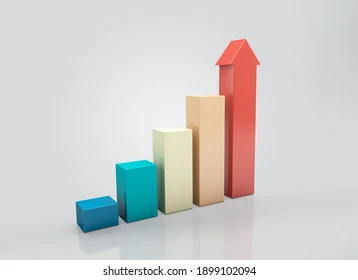

A boxplot gives a summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines show the highest and lowest value excluding outliers.

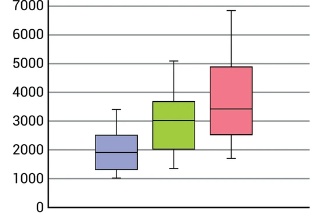

**Observations of Age**

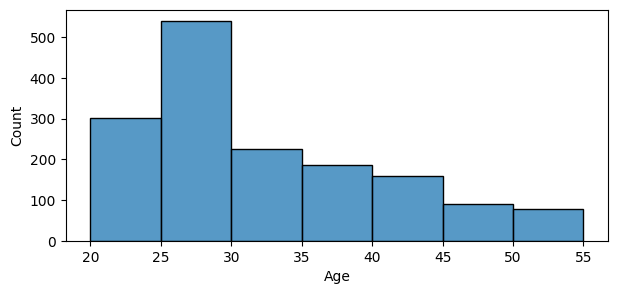

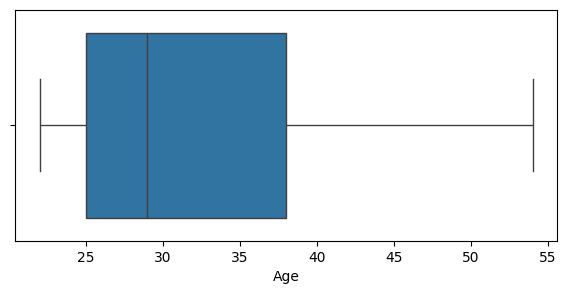

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='Age',bins=[20,25,30,35,40,45,50,55])
plt.show();
plt.figure(figsize=(7,3))
sns.boxplot(data=data,x='Age')
plt.show();

*  The distribution is skewed towards right
*  The cars are bought by the people who are between the age 25 to 30 years
*  Less number of cars bought by the people at the age of 50.
*  There no outliers
*  Median is between 25 years to 30 years range

**Observations on Number of dependents**

<Figure size 300x300 with 0 Axes>

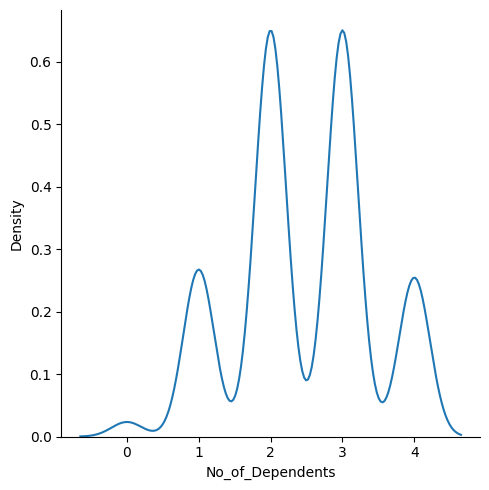

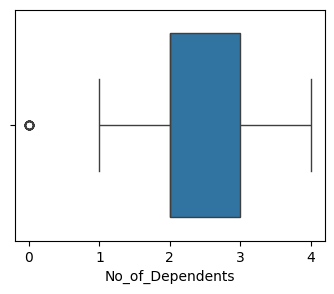

In [ ]:
plt.figure(figsize=(3,3))
sns.displot(data=data,x='No_of_Dependents',kind='kde')
plt.show()
plt.figure(figsize=(4,3))
sns.boxplot(data=data,x='No_of_Dependents')
plt.show()

*  Maximum number of dependence on the car purchaser are 4 member .
*  Some of the clients have zero dependence on them.
*  There is a outlier in the boxplot , which shows zero dependence
* Those who are buying the cars more having 2 and 3 dependents on them.

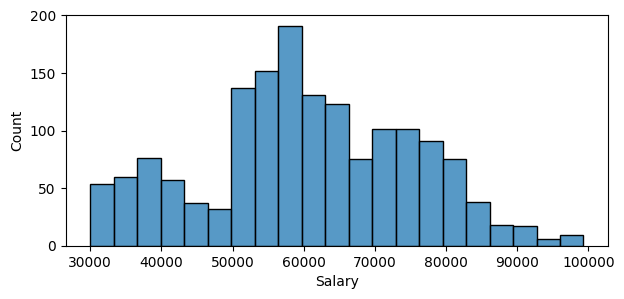

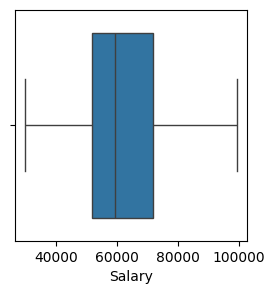

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='Salary')
plt.show();
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='Salary')
plt.show();

*  More number of car buyers are receiving salary between 55000 to 60000 dollars.
*  The people who are having a salary range between 95000 to 100000 dollars are not much spending there money on cars.
*  There is no outliers
*  And the median is at 60000 dollars

<Figure size 700x400 with 0 Axes>

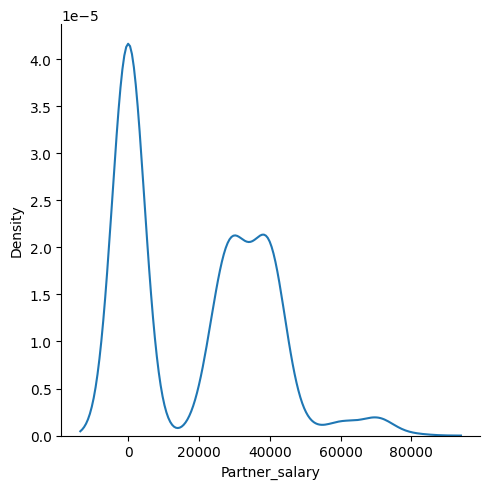

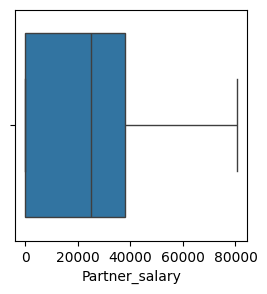

In [ ]:
plt.figure(figsize=(7,4))
sns.displot(data=data,x='Partner_salary',kind='kde')
plt.show()
plt.figure(figsize=(3,3))
sns.boxplot(data=data,x='Partner_salary')
plt.show()

*  Parter's of the buyers are getting below 10000 dollars

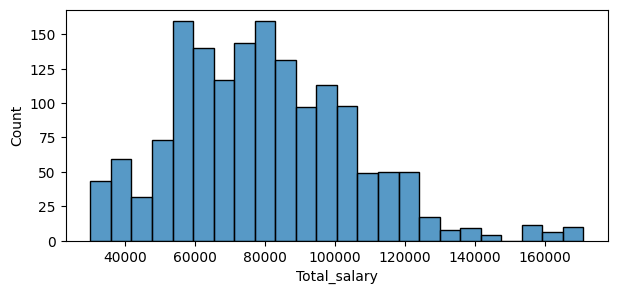

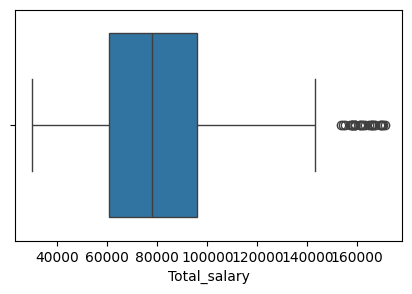

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='Total_salary')
plt.show();
plt.figure(figsize=(5,3))
sns.boxplot(data=data,x='Total_salary')
plt.show()

*  Most of the cars are bought by those who are getting salary around 60000 and 80000
*  Outliers are there in the right

<Figure size 700x300 with 0 Axes>

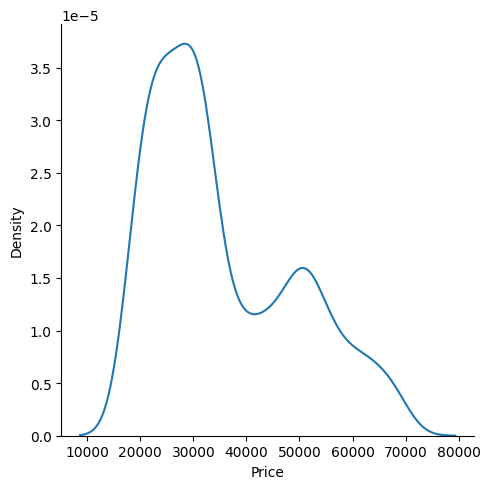

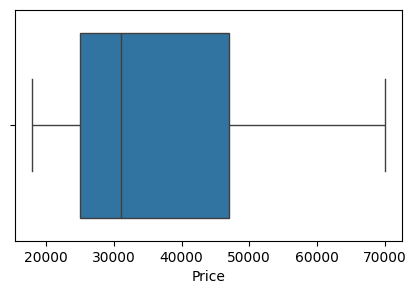

In [ ]:
plt.figure(figsize=(7,3))
sns.displot(data=data,x='Price',kind='kde')
plt.show()
plt.figure(figsize=(5,3))
sns.boxplot(data=data,x='Price')
plt.show();

*  The distribution of the price is skewed towards the right.
*  There are no outliers in this variable.
*  Minimum price of the cars is 20000 dollars which bought more as compared to other cars.
*  maximum price of the cars is 70000 dollars which bought lower.Maximum sales is between 25000 to 35000 dollars price.
* Median is between 30000 to 35000.

***Lets explore the categorical variables now***
Bar charts can be used to explore the distribution of categorical variables.Each entity of the categorical

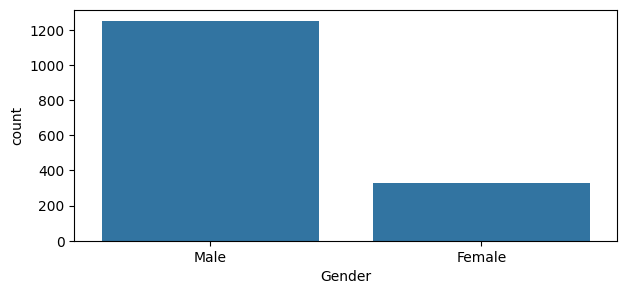

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Gender')
plt.show()

*  Among number of buyer males are dominant in buying cars rather than female
* Female buying cars is rare as compared to male.

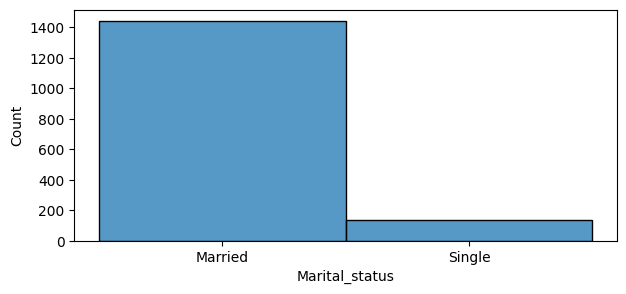

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='Marital_status')
plt.show()

* Number of married buyers are more than single ones.

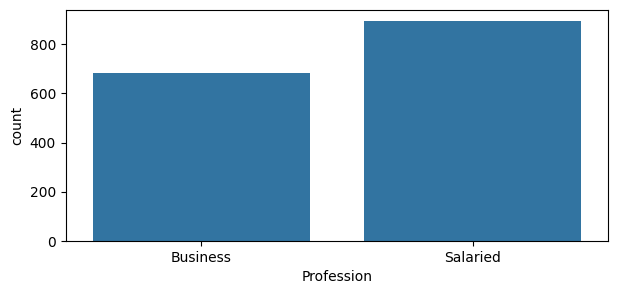

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Profession')
plt.show()

* Salaried people are more than the businessmen who are the buying cars.
* Businessmen also buys the car but less than the salaried ones .

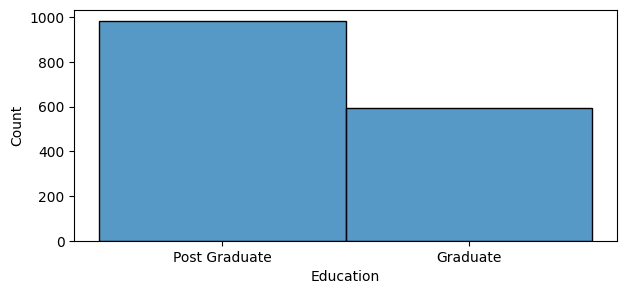

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='Education')
plt.show()

* Number of post graduates are more than the number of graduates

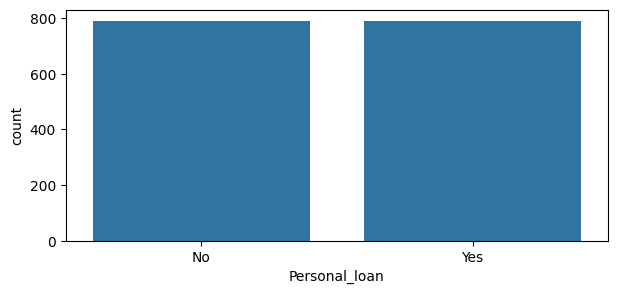

In [ ]:
#checking how much money spent on purchasing automobiles by individuals who took a personal loan.
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Personal_loan')
plt.show()

*  Number of buyers who have personal loan are as same as the buyers who dont have any personal loan.


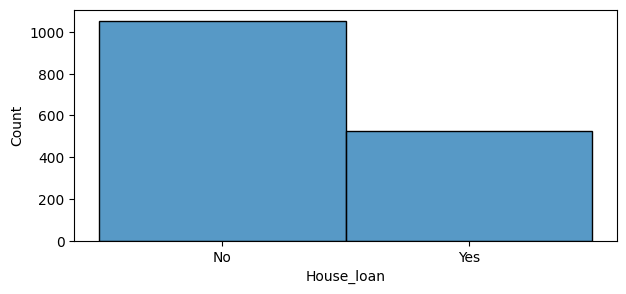

In [ ]:
plt.figure(figsize=(7,3))
sns.histplot(data=data,x='House_loan')
plt.show()

* Buyers who have house house loan are less than the people who do not have any house loan.

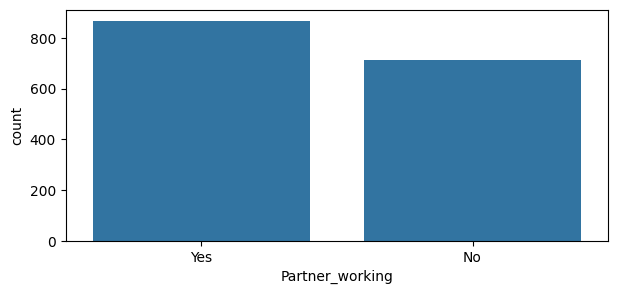

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Partner_working')
plt.show()

* Buying cars by those who have working partners are more frequante as compared to those whose partners are not working

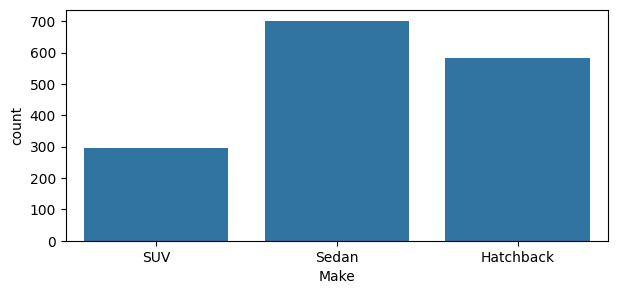

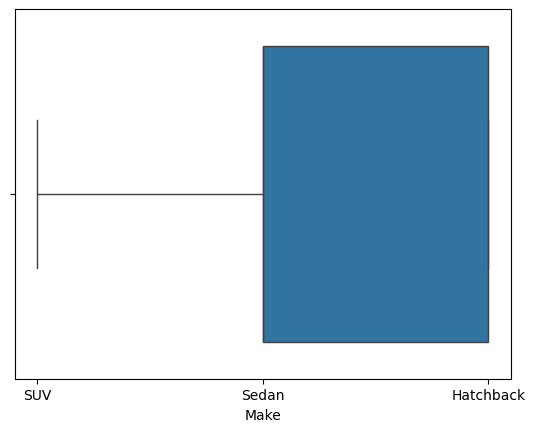

In [ ]:
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Make')
plt.show()
sns.boxplot(data=data,x='Make');

*  Sedan cars are most preferable than the SUV and the hatchback.
*  Sedan car selling is around 700 where as SUV and hatchback are around 300 and 600 counts.

##**Bivariate Analysis**


Bi means two and variate means variable, so here there are two variables. The analysis is related to the relationship between the two variables.

Different types of Bivariate Analysis that can be done:

* Bivariate Analysis of two Numerical Variables
* Bivariate Analysis of two Categorical Variables
* Bivariate Analysis of one Numerical Variables and one Categorical Variable

**Let us plot bivariate charts between variables to understand their interaction with each other.**

###**Correlation by Heatmap**
A **heatmap** is a graphical representation of data as a color-encoded matrix. It is a great way of representing the correlation for each pair of columns in the data.The heatmap() function of seaborn helps us to create such a plot.

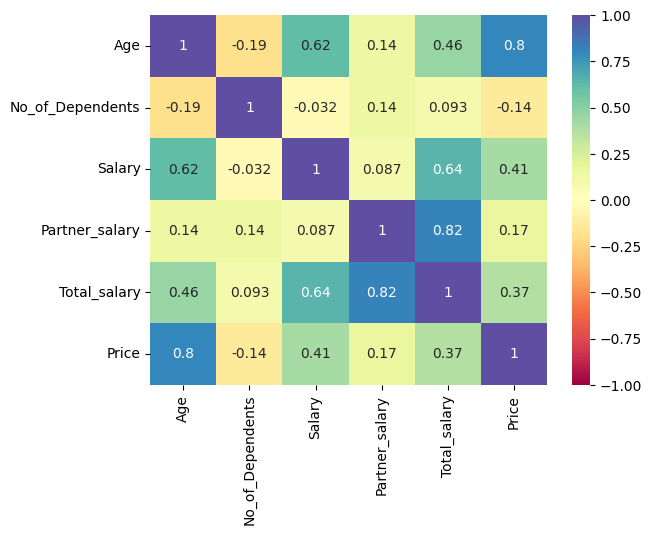

In [ ]:
num_var=['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']
corr=data[num_var].corr()
sns.heatmap(corr,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

*  Parnter salary has high correlation with total salary.
*  Age negatively correlated with number of dependents which means when the age is high number of dependents is low.
* Price is also negatively correlated with number of dependents , which shows when number of dependents are less buyer purchase higher price cars which make sense too.
*  Salary is negatively correlated with number of dependents.
*  Age is positively correlated with price which shows when age increases capacity of buying higher price cars is also increases.
* Salary is positively correlated with total salary , when salary increases total salary is also increases which is expected.

###**Bivariate Scatter Plots**


A scatterplot displays the relationship between 2 numeric variables. For each data point ,the value of its first variable is represented on the x-axis , the second on the y-axis.

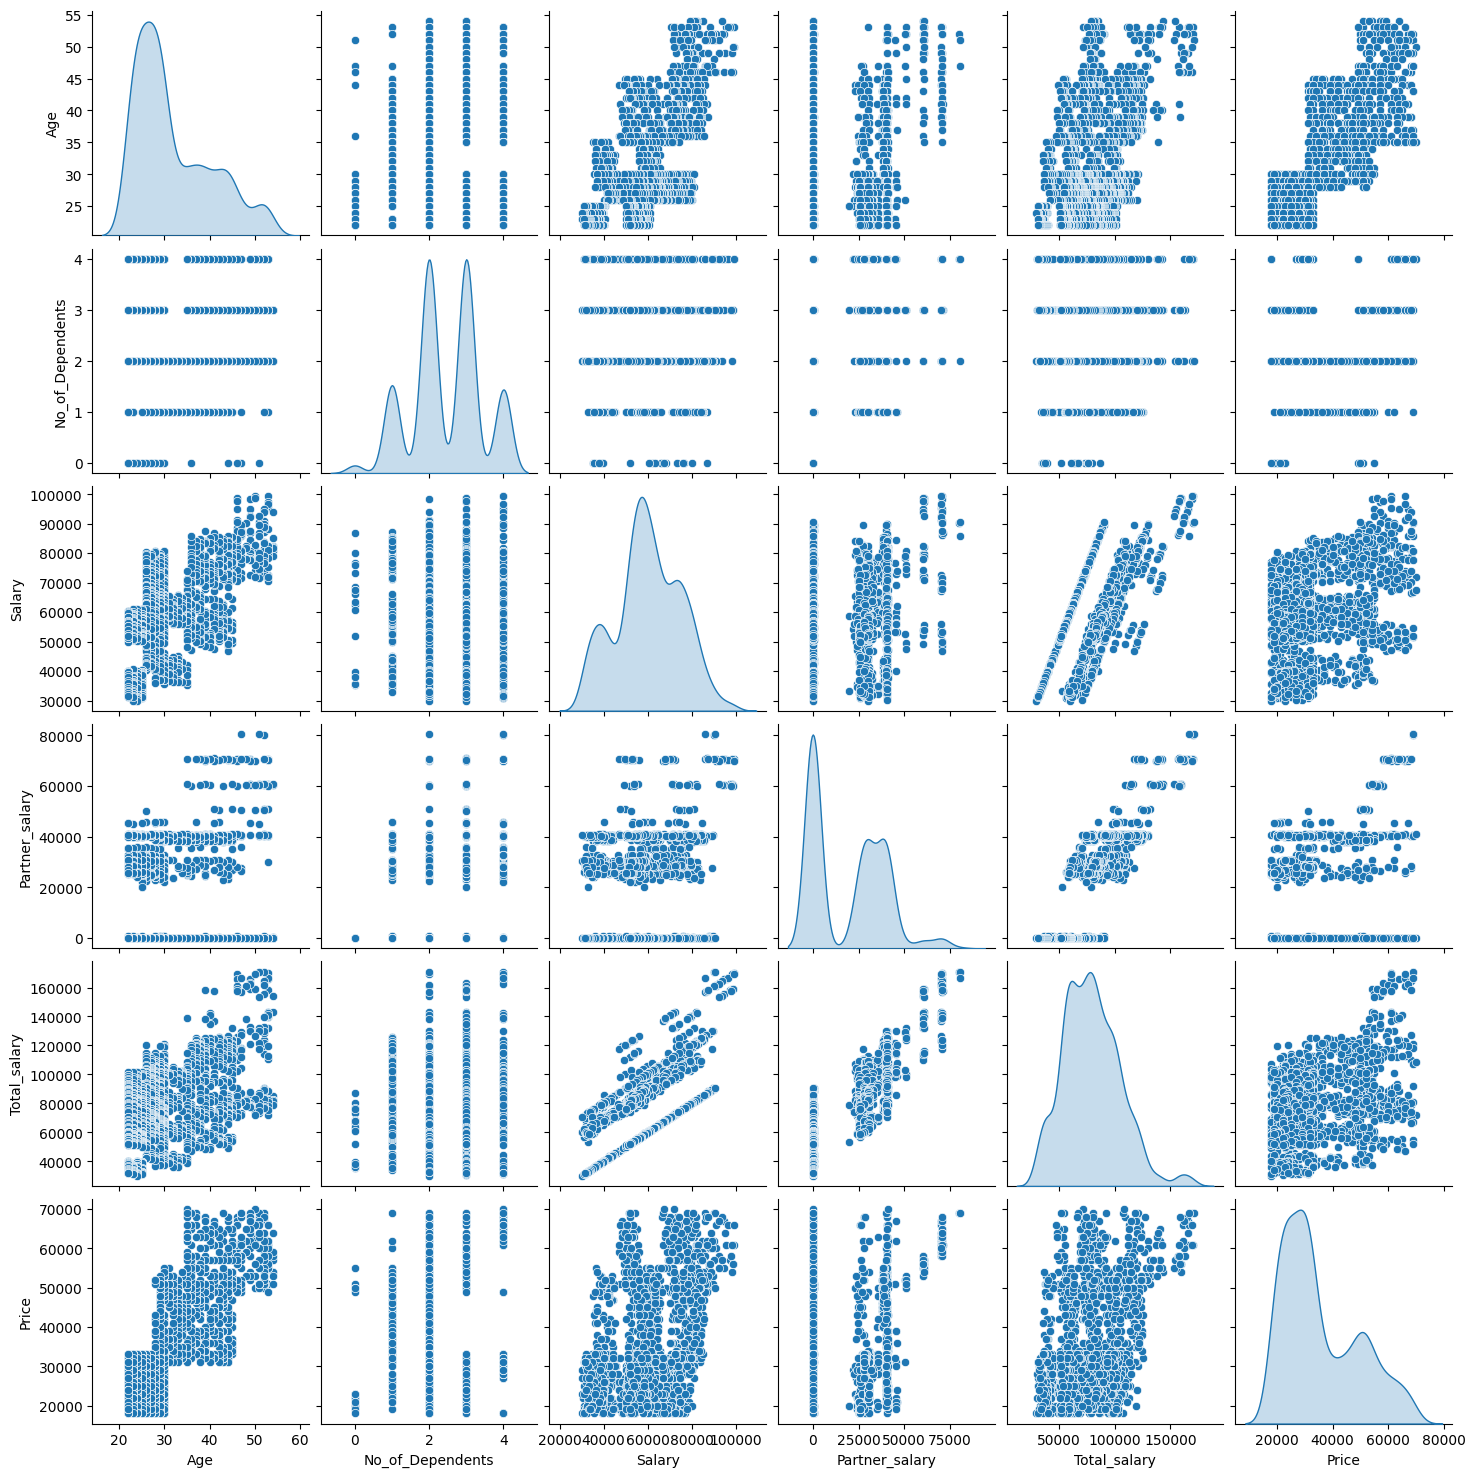

In [ ]:
sns.pairplot(data=data[num_var],diag_kind='kde')
plt.show()

* We get the same insights as from the correlation plot.
* Price is also negatively correlated with number of dependents , which shows when number of dependents are less buyer purchase high price cars which make sense too.

**Now lets check the trends make across different age based variables.**

We can check th trend for age measures by plotting line charts.
A line chart is often used to visualize a trend in data over intervals of time ,thus the line is often drawn chronologically.

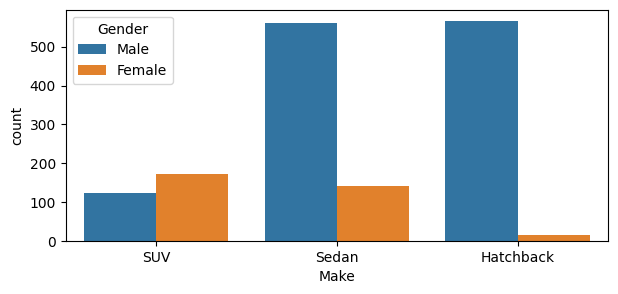

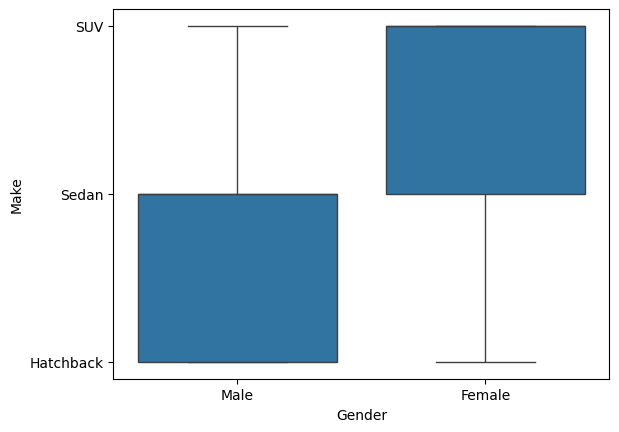

In [ ]:
# checking whether buying types of cars vary by gender.
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Make',hue='Gender')
plt.show()
sns.boxplot(data=data,x='Gender',y='Make')
plt.show()

*  Sedan cars are most preferable than the SUV and the hatchback.
*  Sedan car selling is around 700 where as SUV and hatchback are around 300 and 600 counts.
* Female prefer suv cars than the sedan and the hatchback.
* Male prefer more hatchback than the sedan and the suv

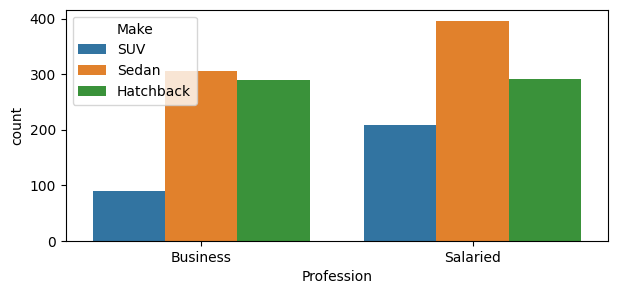

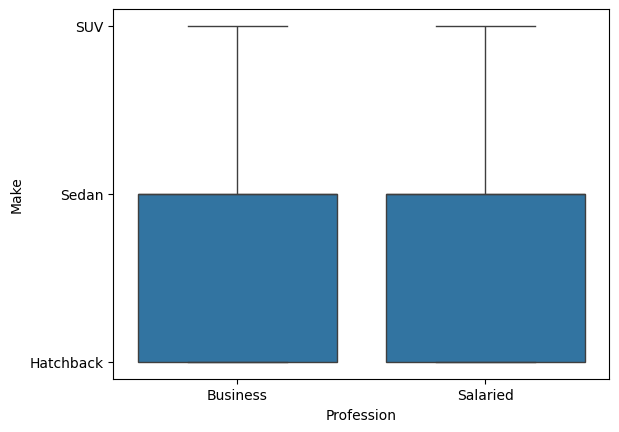

In [ ]:
#checking whether the profession influences on the types of the car.
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Profession',hue='Make')
plt.show()
sns.boxplot(data=data,x='Profession',y='Make')
plt.show()

* Salaried people are more than the businessmen who are the buying cars.
* Salaried person prefer sedan cars more than suv and hatchback .
* It's also similar to businessmen .

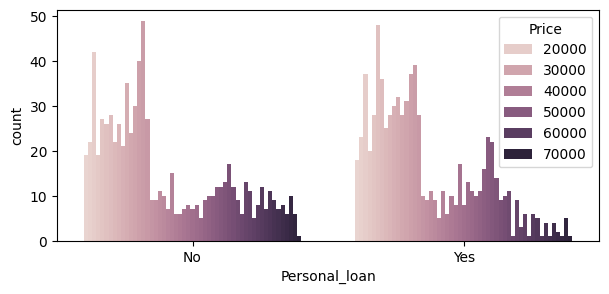

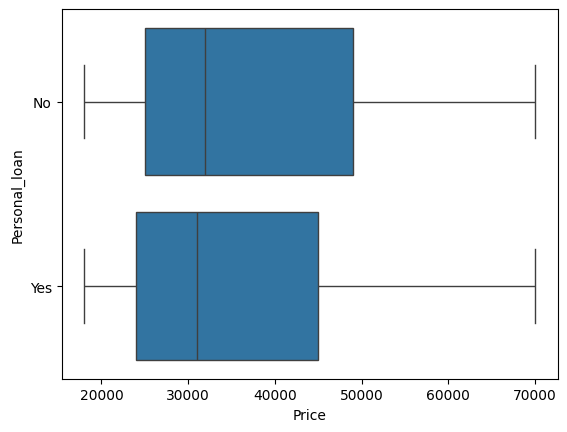

In [ ]:
#checking how much money spent on purchasing automobiles by individuals who took a personal loan.
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Personal_loan',hue='Price')
plt.show()
sns.boxplot(data=data,x='Price',y='Personal_loan')
plt.show()

*  Number of buyers who have personal loan are as same as the buyers who dont have any personal loan.
* Those who have loan buy most of the cars of the price 20000.
* whereas the people who dont have any personal loan buy most of the cars of price 30000.

**LINE CHART**

A LINE CHART is often used to visualize a trend in data over intervals of time , thus the line is often drawn chronologically.

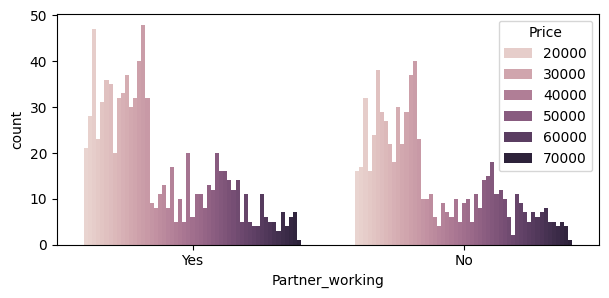

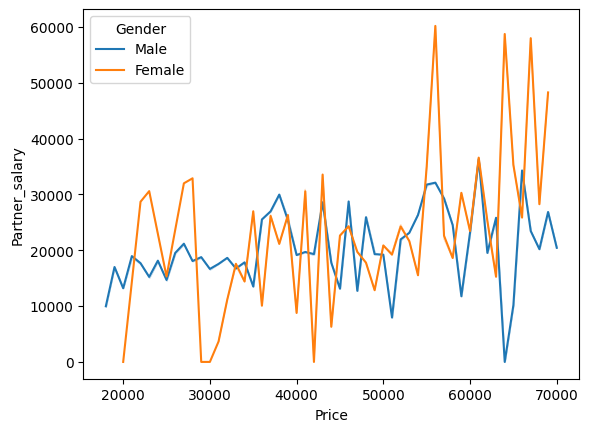

In [ ]:
# checking whether having a working partner influence the purchase of higher priced cars.
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Partner_working',hue='Price')
plt.show()
sns.lineplot(data=data,x='Price',y='Partner_salary',errorbar=('ci',False),hue='Gender')
plt.show();

* Buying cars by those who have working partners are more frequante as compared to those whose partners are not working
* Those who have working partner buy higher priced cars as compared to those whose partners are not working.
* People who have working partner tend to buy cars and also tend to buy higher priced cars , which is expected.
* Female who has a working partner buy cars of the price around 50000 to 60000 .
*  Male who has a working partner but does not spend amount on buying of cars around 60000 to 70000 but female spend most than the male according to above plot.

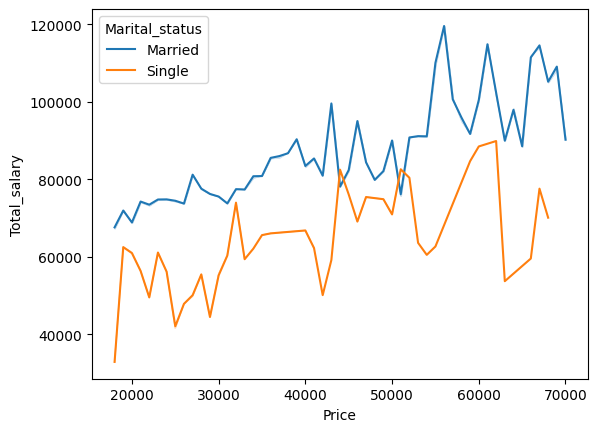

In [ ]:
sns.lineplot(data=data,x='Price',y='Total_salary',errorbar=('ci',False),hue='Marital_status')
plt.show()

*  Those who are married spend much money than the those who are not married.
*  Highest total salary is getting by married ones which is around 100000 to 120000
* But the highest salary getting by singles are around 80000 to 100000.
* Increasing in salary increases in net spending on cars which is expected.

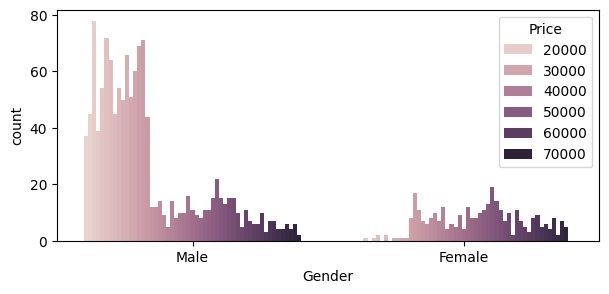

In [ ]:
#checking whether amount spent on automobiles vary by gender.
plt.figure(figsize=(7,3))
sns.countplot(data=data,x='Gender',hue='Price')
plt.show()

*  Among number of buyers males are dominant in spending on cars rather than females
* Female buying cars is rare as compared to male.
* Female spending on cars around 20000 is as similar as male .

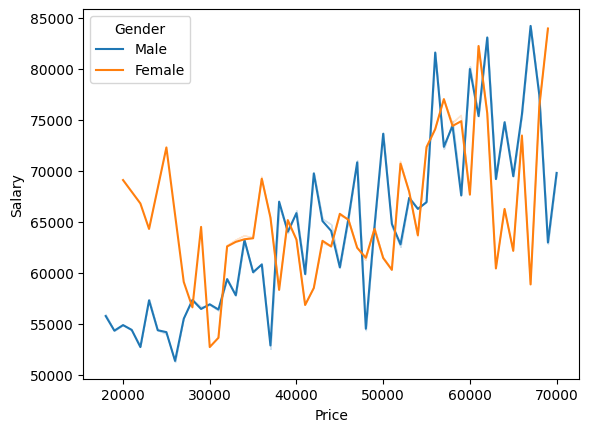

In [ ]:
sns.lineplot(data=data,x='Price',y='Salary',errorbar=('ci',False),hue='Gender')
plt.show()

*  As the salary hikes net spending on the cars is high which make sense.
*  Increasing in salary means increasing in spending by both male and the female.

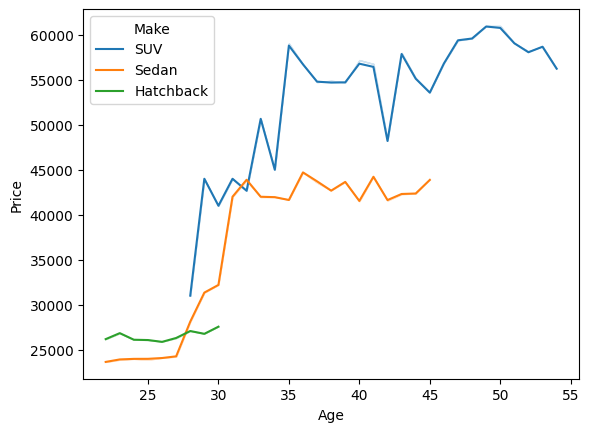

In [ ]:
sns.lineplot(data=data,x='Age',y='Price',hue='Make',errorbar=('ci', False))
plt.show()

*  Buying hatchback is less and constant between the age of 20 years to 30 years and price is between 25000 to 30000 .
*  when the age is between 20 to 30 years old the buying of sedan becomes constant which is of 25000 .However the age increases the buying capacity of the buyers is also increases and buys sedan more than the hatchback.
* buying SUV begins at the age between 25 to 30 years . As said before buying capacity of buyer is increasing while the age increases.


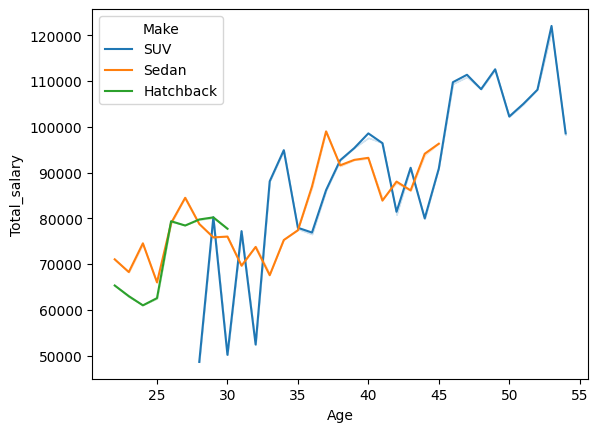

In [ ]:
sns.lineplot(data=data,x='Age',y='Total_salary',hue='Make',errorbar=('ci', False))
plt.show()

*  As per above plot the buying of cars is hatchback and sedan between the age 20 to 30 years.
* After the age of around 27 buyers starts to purchase SUV more.
*  There is a demand for SUV at the age of 45 to 55 than the sedan.
* From the age 27 to 45 sedan and SUV goes hand by hand ,there is a demand for both the cars till 45.

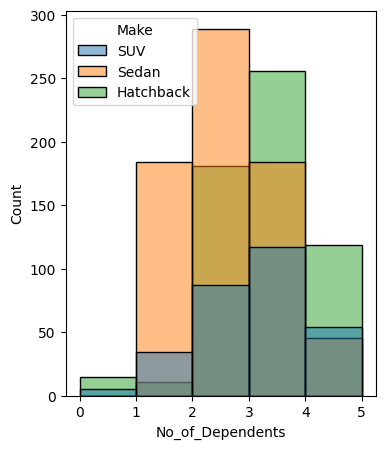

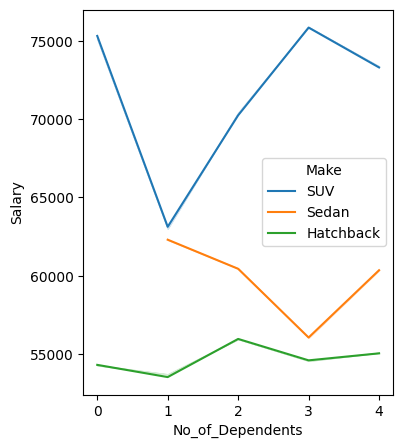

In [ ]:
plt.figure(figsize=(4,5))
sns.histplot(data=data,x='No_of_Dependents',hue='Make',bins=[0,1,2,3,4,5])
plt.figure(figsize=(4,5))
sns.lineplot(data=data,x='No_of_Dependents',y='Salary',hue='Make',errorbar=['ci',False])
plt.show()

*  When the depends is less buyers go for sedan more than hatchback and SUV .
*  when increase in the number of dependents ,increase in buying of hatchback and SUV.
* When increase in salary and increase in number of dependents , increases in the buying of SUV and sedan

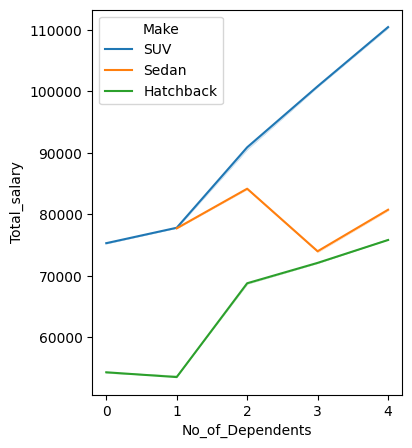

In [ ]:
plt.figure(figsize=(4,5))
sns.lineplot(data=data,x='No_of_Dependents',y='Total_salary',hue='Make',errorbar= ("ci",False))
plt.show()

* However the total salary and number of dependents increases demand for suv also increses.
* Demand for sedan cars decreases , when the number of dependents increases.
* Demand for Hatchback is also similar as the demand for SUV.

##**Multi-variate Analysis**

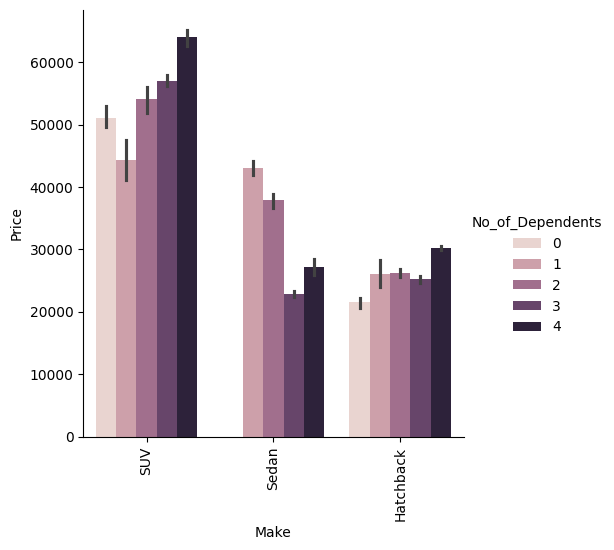

In [ ]:
sns.catplot(data=data,x='Make',y='Price',kind='bar',hue='No_of_Dependents')
plt.xticks(rotation=90)
plt.show()

* as said above demand for SUV and hatchback increases when the number of dependents increases.
* Price of SUV is more than the price of sedan and hatchback.
* And the price of hatchback is lower than sedan and SUV.

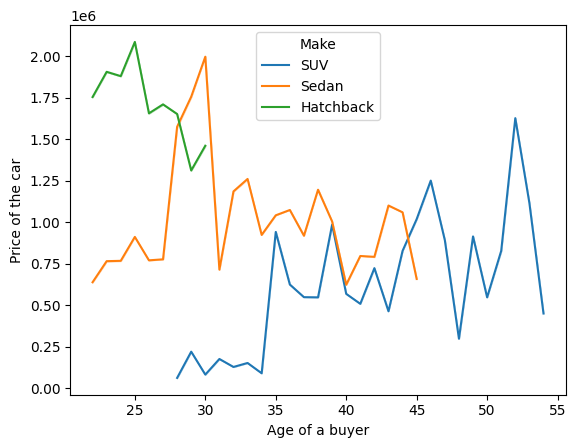

In [ ]:
sns.lineplot(data=data,x='Age',y='Price',hue='Make',estimator='sum',errorbar=('ci', False))
plt.ylabel('Price of the car')
plt.xlabel('Age of a buyer')
plt.show();

##**Outliers Detection and Treatment**
**Lets visualize all the outliers present in data together**


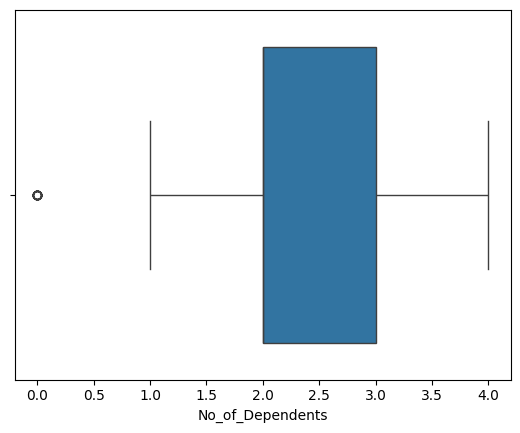

In [ ]:
#checking outliers in number of dependents variable
sns.boxplot(data=data,x='No_of_Dependents')
plt.show()

*  We are not going to treat outliers because it seems to be genuine and we can miss out any of important information by treating genuine information.
*  Many people might not have any dependents on them , thats why we are not going to treat outliers.

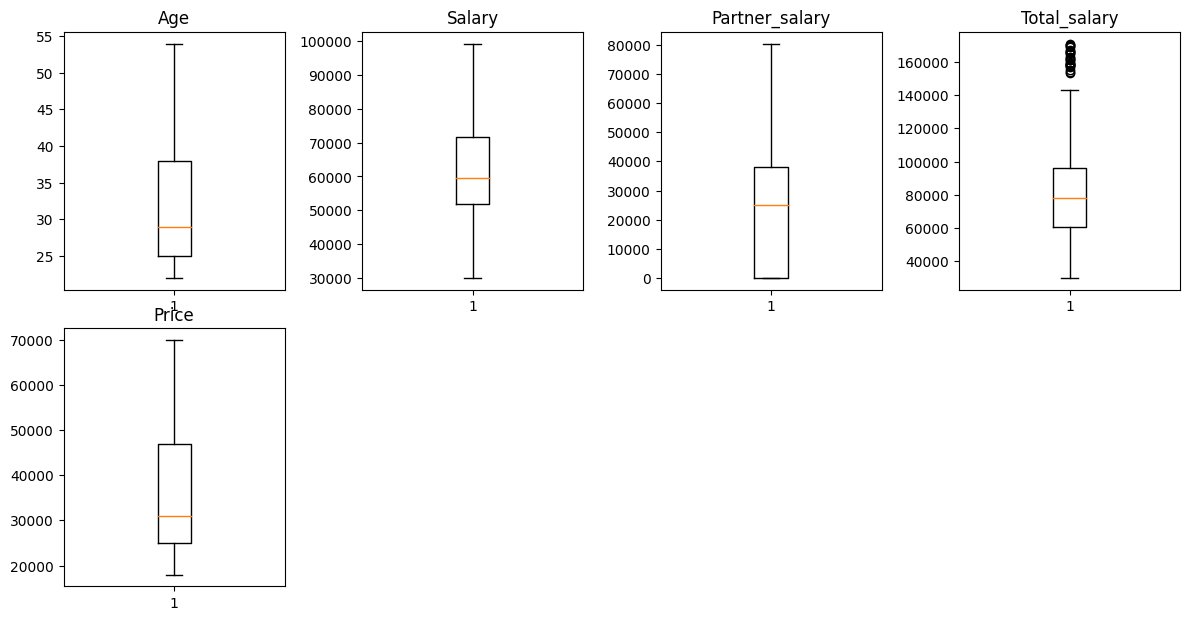

In [ ]:
numeric_columns=['Age','Salary','Partner_salary','Total_salary','Price']
plt.figure(figsize=(12,12))
for i, variable in enumerate(numeric_columns):
  plt.subplot(4,4,i+1)
  plt.boxplot(data[variable],whis=1.5)
  plt.tight_layout()
  plt.title(variable)
plt.show()

* Total salary column has a wide range of values with lots of outliers. However we should treat these outliers.
* Except total salary there is no outliers in any other variable.

In [ ]:
Q1=data[numeric_columns].quantile(0.25)
Q3=data[numeric_columns].quantile(0.75)
IQR=Q3-Q1
lower_whisker=Q1-1.5+IQR
upper_whisker=Q3+1.5+IQR

In [ ]:
def treat_outliers(data,col):
  Q1=data[col].quantile(0.25)
  Q3=data[col].quantile(0.75)
  IQR=Q3-Q1
  lower_whisker=Q1-1.5*IQR
  upper_whisker=Q3+1.5*IQR
  data[col]=np.clip(data[col],lower_whisker,upper_whisker)
  return data

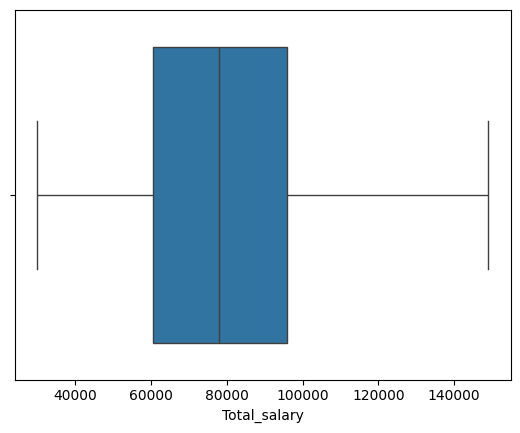

In [ ]:
data=treat_outliers(data,'Total_salary')
sns.boxplot(data=data,x='Total_salary')
plt.show()

*  Successfully removed the outliers of total salary.

#**Actionable Insights and Recommendations**

###**Actionable Insights**

We analyzed a dataset of Austo Motor Company which is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models to get a fair idea about demand of customers which will help them in enhancing their customer experience.Both from an environmental and business perspective, having cars which has less demand or having no cars which has higher demand is inefficienct. Thus we determined the factors that effect sales and the nature of their effect.

We have been able to conclude that-

1.Demand for the lesser priced cars is higher than the high priced cars.

2.people buy more cars at the age of 25 to 30.While age increases the demand for cars decrease.Buying hatchback is less and constant between the age of 20 to 30 years and price is between 25000 to 30000 .When the age is between 20 to 30 years old the buying of sedan becomes constant which is of 25000 .However the age increases the buying capacity of the buyers is also increases and buys sedan more than the hatchback.Buying SUV begins at the age between 25 to 30 years .As said before buying capacity of buyer is increasing while the age increases.

3.Increasing in salary increases in net spending on cars which is expected.

4.When a person has 2 or 3 dependents on him or her , then he or she decides to buy a car , which makes sense.When the depends is less buyers go for sedan more than hatchback and SUV .When increase in the number of dependents ,increase in buying of hatchback and SUV.When increase in salary and increase in number of dependents , increases in the buying of SUV and sedan.

5.Among number of buyer males are dominant in buying cars rather than female

6.Cars bought by married ones than the singles.

7.Salaried people are more than the businessmen who are the buying cars.

8.People who are post graduate buys frequently then graduates.

9.Buyers who have house house loan are less than the people who do not have any house loan.

10.Buyers who have house house loan are less than the people who do not have any house loan.

11.Sedan cars are most preferable than the SUV and the hatchback.Female prefer suv cars than the sedan and the hatchback. Male prefer more sedan later the hatchback and the suv.

12.Salaried person prefer sedan cars more than suv and hatchback .

13.Those who have loan buy most of the cars of the price 20000. Whereas the people who dont have any personal loan buy most of the cars of price 30000.

14.Those who have working partner buy higher priced cars as compared to those whose partners are not working.



##**Business Recommendations**

1.Demand for the lesser priced cars is more than the higher priced cars ,so should focus on lesser priced cars.

2.Salaried couples who are post gradutes buys car the most so should focus on them to increase sales.

3.Buying hatchback is less and constant between the age of 20 to 30 years and price is between 25000 to 30000, so to sell hatchback company should focus who are at the age of 20 to 30 years.

4.Men who doesnt have house loan tend to buy cars more than the women so should focus on men.

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile=ProfileReport(data,title='Profiling Report')
profile

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1f2704cbc364d9fa2be9df0c40c0fcda4e94513a28b7ccb294cf9425e5b2cc0f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.to_csv()